## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")
# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
combine_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [3]:
# Checking the number of mice.

#specifying the column with mouse information (mouse id)
#the unique mouse is saved in the variable as a list, and call the len function for length of list
mice = len(combine_data["Mouse ID"].unique())
mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = combine_data[combine_data.duplicated(["Mouse ID","Timepoint"])]
mice_dup["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dup = combine_data[combine_data.duplicated(["Mouse ID","Timepoint"],keep=False)]
mice_dup


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#had to google how to index the value and remove them from the data
#Also created a variable to store the dropped duplicate data. incase Origninal df is needed
clean_data = combine_data
clean_df = clean_data[clean_data["Mouse ID"] == 'g989'].index
clean_data.drop(clean_df, inplace=True)

#source used : https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a

In [7]:
clean_data.count()

Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df_mouse = len(clean_data["Mouse ID"].unique())
clean_df_mouse



248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
st_tb = clean_data.groupby("Drug Regimen")

tb_mean = st_tb['Tumor Volume (mm3)'].mean()
tb_median = st_tb['Tumor Volume (mm3)'].median()
tb_var = st_tb['Tumor Volume (mm3)'].var()
tb_std = st_tb['Tumor Volume (mm3)'].std()
tb_sem = st_tb['Tumor Volume (mm3)'].sem()

table_df = pd.DataFrame({"Tumor vol Mean": tb_mean, "Tumor vol Median": tb_median,
                         "Tumor vol Variance": tb_var, "Tumor Vol Std dev": tb_std
                        , "Tumor vol Std error" : tb_sem})
table_df



,Tumor vol Mean,Tumor vol Median,Tumor vol Variance,Tumor Vol Std dev,Tumor vol Std error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

#http://www.python-ds.com/python-data-aggregation : was used to help to create aggregation
aggregation = {'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]}

groupby_tbl = clean_data.groupby("Drug Regimen")
groupby_tbl.agg(aggregation)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

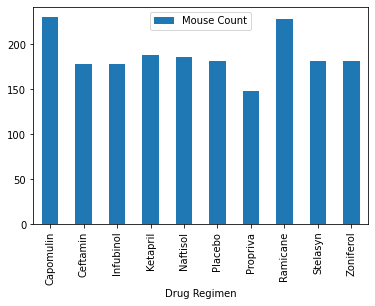

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_per_regimen = pd.DataFrame({"Mouse Count" : groupby_tbl["Mouse ID"].count()})
mouse_per_regimen

pandas_bar = mouse_per_regimen.plot.bar()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

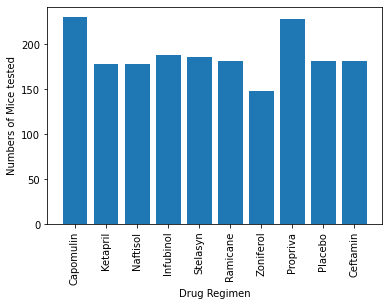

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimen = clean_data["Drug Regimen"].unique()
numb_mice = groupby_tbl["Mouse ID"].count()

plt.bar(drug_regimen, numb_mice,)
plt.xlabel("Drug Regimen")
plt.ylabel("Numbers of Mice tested")
plt.xticks(rotation='vertical')


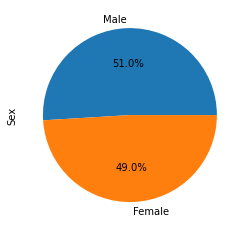

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data["Sex"].value_counts()
plot = gender.plot.pie(y= gender, autopct="%1.1f%%")





([<matplotlib.patches.Wedge at 0x7fde75463fd0>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.034585741995461654, -1.149479806891197, 'Male')],
 [Text(0.018044734954153967, 0.5997285948997549, '49.0%'),
  Text(-0.019548462867000065, -0.6497059778080678, '51.0%')])

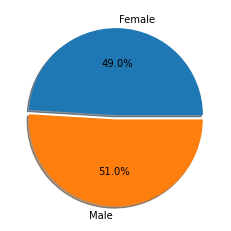

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_data["Sex"].unique()
values = clean_data.groupby("Sex")["Mouse ID"].count()
explode = (0.0,0.05)
plt.pie(values, explode=explode ,labels=gender, autopct="%1.1f%%", shadow = True)


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#creating the list of drug regimen thats needed
dr_reg = ["Capomulin","Ramicane","Infubionl", "Ceftamin"]
#using .isin() method to filter df for the value that matches the list.
#geekforgreek as reference
test_script = clean_data[clean_data["Drug Regimen"].isin(dr_reg)]
test_script.head()



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
